# A simple language



The Serpinski gasket is a fractal pattern of subdivided triangles. 
It can be constructed using lines or triangles. It can be constructed as 
well in three dimensions using planes or using volumes. The gasket
can be constructed from many randomly chosen points; or by unfurling
jointed line segments. It is found in the Pascale triangle as the 
distribution of even and odd numbers, and it can be generated 
using a one-dimensional exclusive-or cellular automata. 


This notebook describes how to generate a Serpinski gasket from a simple language 
that uses four symbols or words. These are { +, -, x, y }. We can begin with a
sentence which is a string of these words. The simplest possible sentence is
either 'x' or 'y'. Let's suppose we begin with 'x'. The discussion here continues
in two parts. The first part describes *substitution* as a way of building a new
sentence from an existing sentence. The second part describes *interpreting* a
sentence visually using (for example) turtle graphics. In the first part it is 
the 'x' and 'y' words that matter and the '+' and '-' words come along for the ride.
In the second part it is the '+' and '-' words that are important.


## First part, Rule S:  for creating new sentences


Go through a sentence one word at a time. In programming speak we say the individual words
are *characters* and the sentence is a *string*. In Python we can set the variable `c` 
equal to each character of string `s` in sequence using this loop:

```for c in s:```

To transform `s` into a new sentence:

- Any character that is not `x` or `y` is simply copied
- Any `x` character must be replaced with `y+x+y`
- Any `y` character must be replaced with `x-y-x`

That is the entirety of Rule S. The interesting part comes from applying the rule
multiple times to a starting sentence. For example, applying it twice to the
simple sentence `x` we would have:


```x --> y+x+y --> x-y-x+y+x+y+x-y-x```


Notice that the second sentence `y+x+y` contains two `+` characters that are simply
copied into the third sentence, per Rule S.


Notice that we have given only two possible starting sentences, 'x' and 'y'. It is up 
to the reader's discretion to decide if other starting sentences should be allowed. 
The core idea of this subject is *experimentation*.


## Second part, Rule D:  for visualizing a sentence


Imagine a **turtle** `t` pointed along some direction or *heading* on a computer screen.
We have three important turtle commands: `t.left(60)`, `t.right(60)`, `t.forward(20)`.
To create a visual interpretation of a sentence: Go through the sentence one word at a
time. If the word is `x` or `y`: Do nothing. If the word is `+` then execute two 
Python commands: `t.left(60)` followed by `t.forward(20)`. If the word is `-` then execute two
Python commands: `t.right(60)` followed by `t.forward(20)`. And that is all there is to Rule D.


The choice of the angle and distance parameters `60` and `20` is to get started. Again
changing them as you see fit is *experimentation*.


Now we can describe a test process to get started:


- set up a new Python file and be sure to `import turtle` and declare `t` as a `Turtle`
- Set up a starting sentence 'x'
- Apply Rule S five times to produce a much longer sentence
- Apply Rule D to this long sentence and see what it looks like



## Refinements and experiments


- You might use different pen colors, for example red for '+' and blue for '-'
- You could lift the pen up and just draw a dot after the `t.forward(n)` command: `t.dot()`
- Asymmetry: make the Rule D forward distances different for `+` and `-`
  More asymmetry: make the Rule D angles different
- Modify Rule S
- Introduce other words

In [1]:
import serpinsky as serp

In [6]:
s = serp.IterateRuleS('y', 8)
# print(s)

0

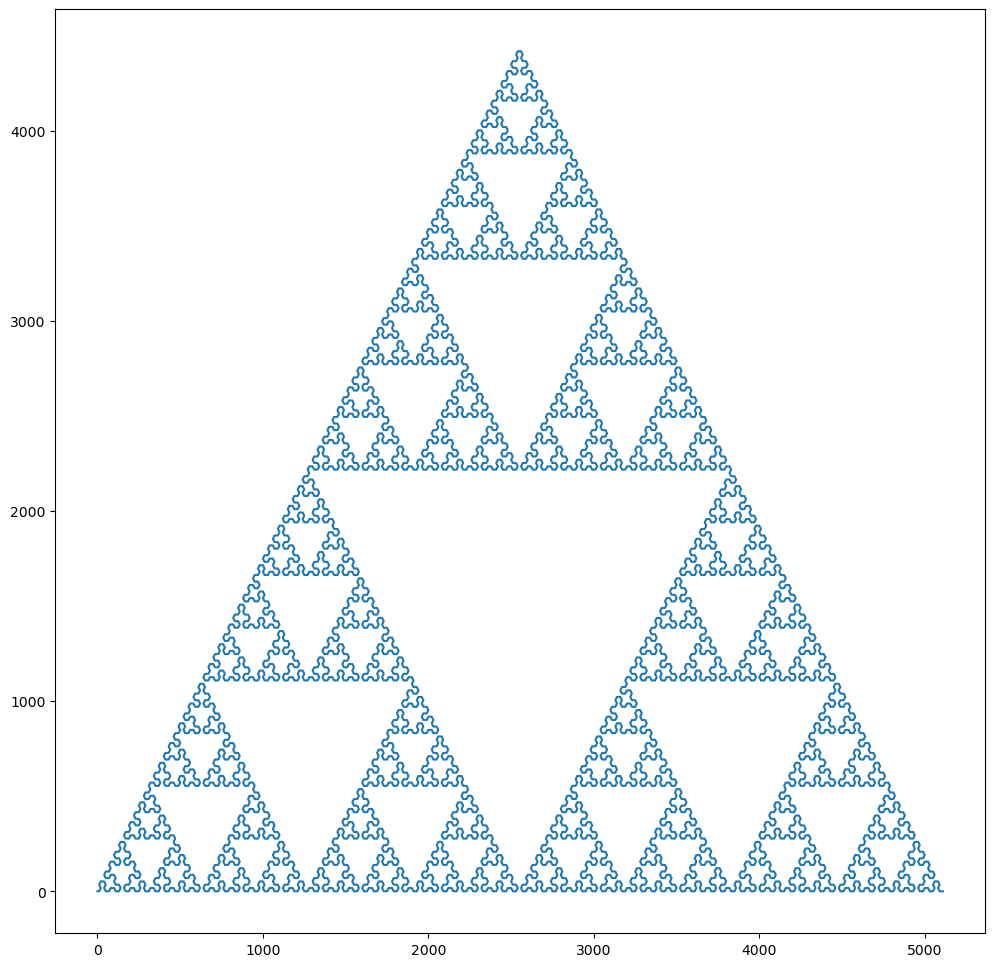

In [7]:
serp.ChartS(s, 10.)

In [8]:
# Are the left and right bends in the figure balanced?
np = 0
nm = 0
for c in s:
    if c == '+': np += 1
    if c == '-': nm += 1

print(np, nm, np/nm, nm/np)

3280 3280 1.0 1.0


Example experimentation, introduces a new word '*':

    if   c == 'x': new_s = new_s + 'y+x+y+x+*'         
    elif c == 'y': new_s = new_s + 'x-y-x+*'
    elif c == '*': new_s = new_s + "x-y-y-y"
